In [5]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import os

In [20]:
cleaned_df = pd.read_json("filtered.json.zip", compression = 'zip')

## Initial analysis on cleaned dataset

In [21]:
YEARS = np.arange(2015, 2021)

key_words_lgbt = "marriage equality|gay|same-sex|same-sex marriage|\
    gay marriage|homosexual marriage|same-gender marriage|lesbian|lesbians|gays|\
    lesbian|bisexual|transgender|transsexual|queer|questioning sexual identity|\
    questioning gender identity|intersex|asexual|pansexual|LGBT|LGBTQ|LGBTQI|LGBTQIA|\
    LGBTQIAA|LGBTQI2A|LGBTQIAAP|LGBTQI2AP|LGBTTQIAAP|LGBTTQI2AP|LGBT+|LGBTQ+|LGBTQI+|\
    LGBTQIA+|LGBTQIAA+|LGBTQI2A+|LGBTQIAAP+|LGBTQI2AP+|LGBTTQIAAP+|LGBTTQI2AP+| polysexual|\
    demisexual|gayprideasexual|asexuals|asexuality|bisexual|bisexuals|bisexuality|cisgender|\
    cisgenders|cisgenderism|demisexual|demisexuals|demisexuality|gay|gays|gaypride|gender \
    fluidity|heteronormative|heteronormatives|heteronormativity|hetero sexual|hetero sexuals|\
    heterosexual|heterosexuals|heterosexuality|homo sexual|homo sexuals|homosexual|homo sexuals|\
    homosexuality|inter sex|intersex|intersexual|intersexuals|intersexuality|lesbian|lesbians|\
    lgbt|lgbt+|lgbtq|lgbtq+|lgbtqi|lgbtqi+|lgbtqi2a|lgbtqi2a+|lgbtqi2ap|lgbtqi2ap+|lgbtqia|\
    lgbtqia+|lgbtqiaa|lgbtqiaa+|lgbtqiaap|lgbtqiaap+|lgbttqi2ap|lgbttqi2ap+|lgbttqiaap|\
    lgbttqiaap+|pan sexual|pan sexuals|pansexual|pansexuals|pansexuality|poly sexual|poly\
    sexuals|polysexual|polysexuals|polysexuality|queer|queers|questioning gender identity|\
    questioning sexual identity|trans gender|trans genders|transgender|transgenders|\
    transgenderism|trans misoginy|transmisoginy|trans phobia|transphobia|transphobic|\
    trans sexual|trans sexuals|transsexual|transsexuals|transsexuality"
key_words_fem = "gender roles|misandry|misogyny|patriarchy|sexism|woman empowerement|toxic masculinity|\
    women's rights|sex equality|women's role|role of women|women's liberation|feminism|feminists"

In [23]:
contains_key_words = cleaned_df["Quote"].str.contains(key_words_fem) # find index containing keywords
data_fem = cleaned_df.iloc[np.where(contains_key_words)].reset_index()
contains_key_words = cleaned_df["Quote"].str.contains(key_words_lgbt) # find index containing keywords
data_lgbt = cleaned_df.iloc[np.where(contains_key_words)].reset_index()

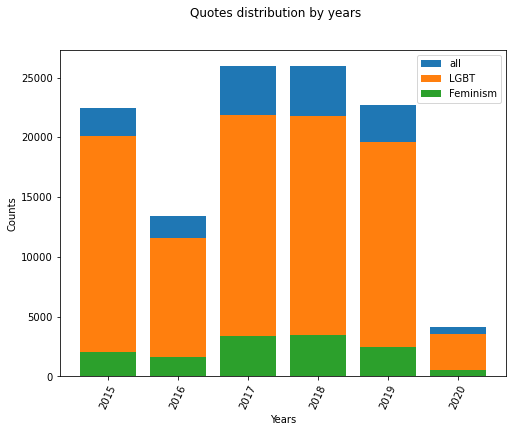

In [24]:
year_quotes = {year: (cleaned_df.quote_year == year).sum() for year in YEARS} 
year_quotes_fem = {year: (data_fem.quote_year == year).sum() for year in YEARS} 
year_quotes_lgbt = {year: (data_lgbt.quote_year == year).sum() for year in YEARS} 
plt.figure(figsize=(8, 6))
plt.suptitle("Quotes distribution by years")
plt.xlabel("Years")
plt.ylabel("Counts")
plt.xticks(rotation=65)
plt.bar(year_quotes.keys(), year_quotes.values(), label="all")
plt.bar(year_quotes_lgbt.keys(), year_quotes_lgbt.values(), label="LGBT")
plt.bar(year_quotes_fem.keys(), year_quotes_fem.values(), label="Feminism")
plt.legend(loc="best")

## Sentiment analysis using VADER

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
def get_sentiment_intensity(tweet_text):
    '''
    This method returns the sentiment intensity
    within a certain Tweet's text (from -1.0 to 1.0).
    '''
    sentiment_analyser = SentimentIntensityAnalyzer()
    polarity_scores = sentiment_analyser.polarity_scores(tweet_text)
    return polarity_scores['compound']

In [34]:
cleaned_df_100 = cleaned_df[:100]

In [35]:
cleaned_df_100['Sentiment'] = cleaned_df_100['Quote'].apply(lambda x: get_sentiment_intensity(x))

<ipython-input-35-72c3fec0a8eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_100['Sentiment'] = cleaned_df_100['Quote'].apply(lambda x: get_sentiment_intensity(x))


In [48]:
cleaned_df_100.head(10)

,date_of_birth,nationality,gender,occupation,Speaker,Quote,numOccurrences,quote_year,quote_month,Sentiment
0,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,This loss is a wake-up call that despite remar...,2,2015,11,-0.8760
1,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"She didn't see it, she hadn't heard of it, she...",1,2015,6,0.0387
2,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,As a journalist and anchor who reaches million...,1,2015,4,0.4939
3,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,By empowering people to talk about their gende...,6,2015,2,0.7003
4,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"By investing in this dangerous programming, TL...",133,2015,1,-0.5610
5,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,attitudes within the Catholic Church towards t...,1,2015,9,0.0000
6,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,showing that many Americans think that we've a...,1,2015,12,0.4588
7,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,These ads have the potential to accelerate muc...,1,2015,12,0.4588
8,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,"By sharing this story, Bruce Jenner has shined...",118,2015,4,0.7579
9,1971,[United States of America],[female],[LGBTIQ+ rights activist],sarah kate ellis,We need to push media companies and creators t...,5,2015,9,0.0000


In [49]:
for idx, i in enumerate(cleaned_df_100["Quote"].iloc[:10]):
   print(idx, i)

0 This loss is a wake-up call that despite remarkable progress for LGBT equality, we must never become complacent in the face of injustice,
1 She didn't see it, she hadn't heard of it, she knew that what she felt inside wasn't lining up with her body, but she wasn't aware of what transgender even met. So, I think even building visibility about what transgender is increases hopefully the people who are living in pain right now, who are potentially suicide candidates, under who they are, accept who they are and see that they can live in this world happily.
2 As a journalist and anchor who reaches millions of viewers, he bring stories to national attention, leading the conversation and accelerating acceptance of the LGBT community.
3 By empowering people to talk about their gender in their own words, Facebook continues to be a leader in its commitment to respecting and protecting LGBT users.
4 By investing in this dangerous programming, TLC is putting countless young LGBT people in harm's